# Análisis estructural del perfil químico

## 1. Objetivo del notebook

En este notebook analizamos el perfil químico de las clases de vino para comprender qué variables explican su separación estructural. Este análisis complementa el modelado realizado previamente.

## 2. Carga de datos y verificación

In [10]:
#Importamos las funciones necesarias para cargar los datos del vino y realizar un resumen de las clases. También importamos las bibliotecas necesarias para la selección de características y visualización de datos.

import sys
sys.path.append("../src")


from functions import load_wine_data, class_summary
from sklearn.feature_selection import f_classif
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [11]:
df = load_wine_data("../data/wine.data")

df["class"].value_counts()


class
1    71
0    59
2    48
Name: count, dtype: int64

Las tres clases están relativamente balanceadas, lo que favorece un entrenamiento estable del modelo sin necesidad de técnicas de balanceo.

## 3. Perfil químico promedio por clase

In [12]:
#Calculamos la media de cada variable química por clase para identificar los rasgos distintivos de cada tipo de vino.
class_means = df.groupby("class").mean()
class_means

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
class,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


Se observan diferencias consistentes en variables fenólicas, alcohólicas y cromáticas entre clases, lo que sugiere una separación química no arbitraria.

## 4. Variables discriminantes (ANOVA)

In [13]:
#Calculamos las variables que más discriminan entre las clases utilizando ANOVA (Análisis de Varianza) para identificar las características químicas que tienen la mayor diferencia entre las clases de vino.

X = df.drop("class", axis=1)
y = df["class"]

f_values, p_values = f_classif(X, y)

anova_results = pd.DataFrame({
    "feature": X.columns,
    "F_score": f_values,
    "p_value": p_values
}).sort_values(by="F_score", ascending=False)

anova_results.head(10)

,feature,F_score,p_value
6,flavanoids,233.925873,3.598586e-50
12,proline,207.920374,5.783168e-47
11,od280_od315,189.972321,1.393105e-44
0,alcohol,135.077624,3.319504e-36
9,color_intensity,120.664018,1.162008e-33
10,hue,101.316795,5.917662e-30
5,total_phenols,93.733010,2.137670e-28
1,malic_acid,36.943425,4.127229e-14
3,alcalinity_of_ash,35.771637,9.444473e-14
8,proanthocyanins,30.271383,5.125359e-12


Las variables con mayor F-score presentan mayor capacidad de separación entre clases.

In [14]:
top_features = anova_results["feature"].head(5).tolist()
top_features

['flavanoids', 'proline', 'od280_od315', 'alcohol', 'color_intensity']

## 5. Visualización estructural

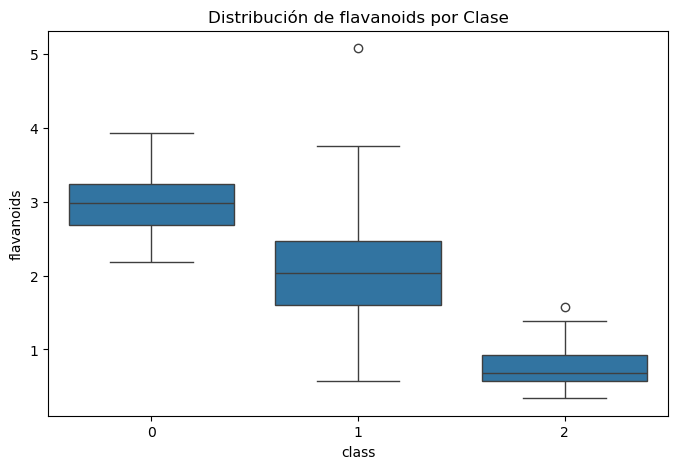

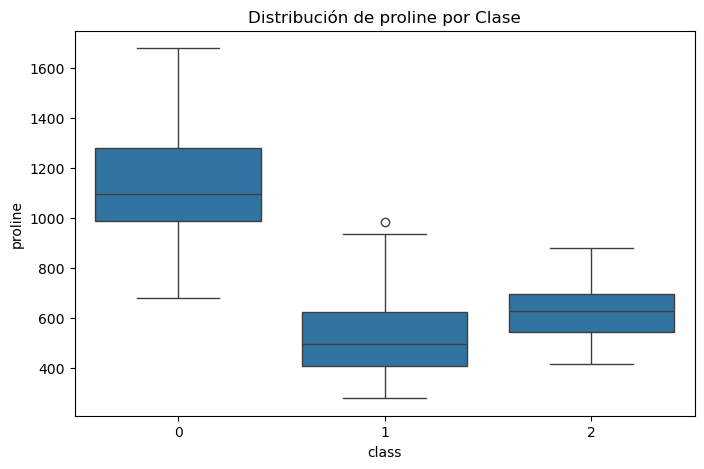

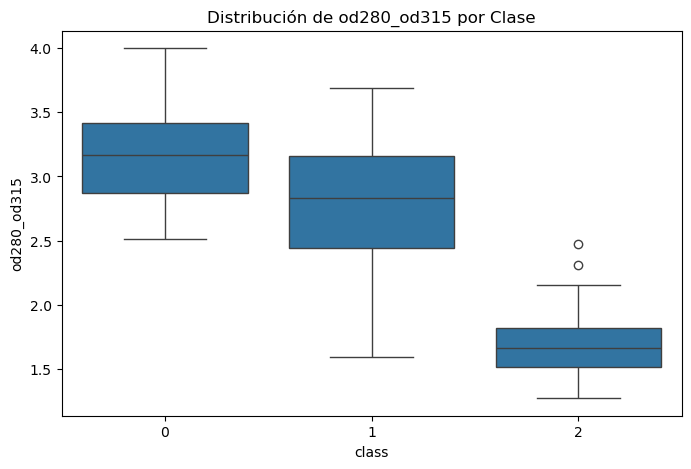

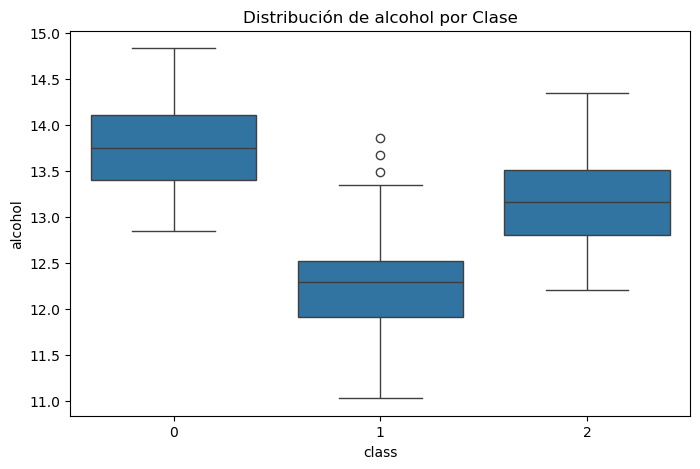

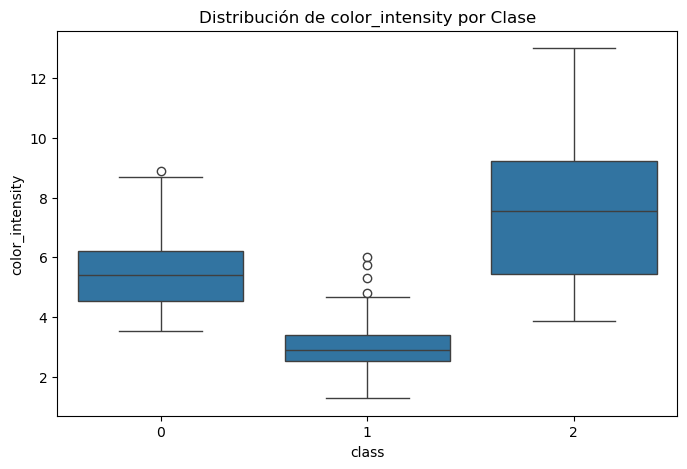

In [15]:
for feature in top_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x="class", y=feature)
    plt.title(f"Distribución de {feature} por Clase")
    plt.show()

## 6. Proyección estructural (PCA)

Reducimos la dimensionalidad para observar si la separabilidad estructural detectada en ANOVA se mantiene en el espacio proyectado.

In [16]:
#Estandarizamos las características para que tengan media 0 y desviación estándar 1, lo que es importante para muchos algoritmos de machine learning.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["class"] = y.values


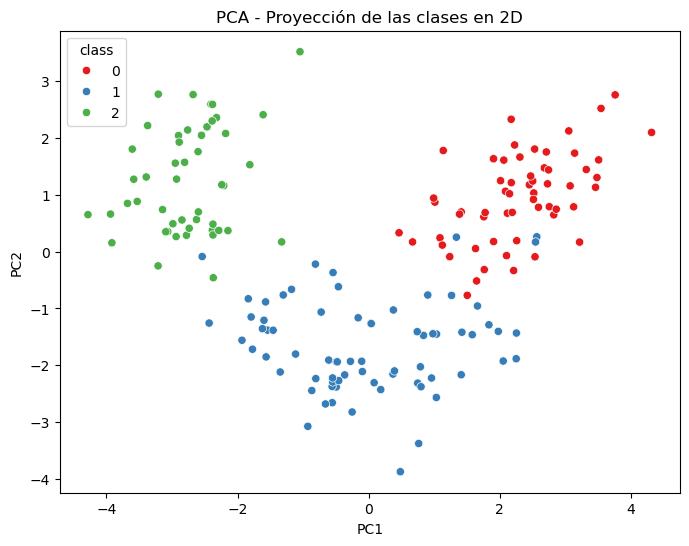

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="class",
    palette="Set1"
)

plt.title("PCA - Proyección de las clases en 2D")
plt.show()

In [18]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

## 7. Síntesis estructural

## Interpretación Enológica de las Clases

A partir del análisis químico:

- **Clase 0 – Perfil Estructurado y Fenólico**  
  Alta concentración de flavonoides y proline. Sugiere mayor cuerpo y complejidad estructural.

- **Clase 1 – Perfil Equilibrado**  
  Composición intermedia y menor intensidad cromática. Representa un perfil más balanceado.

- **Clase 2 – Perfil Intenso y Cromático**  
  Mayor intensidad de color y menor carga fenólica. Indica una expresión visual más marcada.